In [ ]:
#corresponding script to rda_freq_diff, except for rainband intensity based on the mean and standard deviation
#those were calculated in RDA_intensity.ipynb.

#2 methods used:
#1) Analytic estimate pretending intensity is Gaussian (first guess);
#2) Bootstrapping method using actual values of intensity (probably more suitable for the problem)

In [1]:
import numpy as np
import time
import os
import netCDF4 as nc
import datetime
import matplotlib.pyplot as plt
#import masked arrays - important because intensity shows up as a NaN at some points
%matplotlib notebook
import numpy.ma as ma
import scipy.stats as st

In [5]:
## LOAD FROM NETCDF FILE ##
loadfile = "RDA_int_climo"
ferretpath = "/Users/Siwen/Desktop/Ferret/bin/"

#netCDF output file formatting formatting
hovname = ferretpath + loadfile + ".nc"
hovnc = nc.Dataset(hovname, "r")

#populate lists with intensity occupancy plots for each different time period (periods given below)
p1_beg = [1951,1980]
p1_end = [1979,1993]
p2_beg = [1980,1994]
p2_end = [2007,2007]

#in this case, we're just going to load the smoothed plots of hovmoller frequency
ints_1_mean_p1 = []
ints_mean_p1 = []
ints_1_std_p1 = []
ints_std_p1 = []

ints_1_mean_p2 = []
ints_mean_p2 = []
ints_1_std_p2 = []
ints_std_p2 = []


for p1_b, p1_e, p2_b, p2_e in zip(p1_beg, p1_end, p2_beg, p2_end):

    years_p1= str(p1_b-1900) + str("{0:0=2d}".format((p1_e-1900)%100))
    print(years_p1)
    years_p2= str(p2_b-1900) + str("{0:0=2d}".format((p2_e-1900)%100))
    print(years_p2)
    
    ints_1_mean_p1.append(hovnc['int_1_mean_' + years_p1][:])
    ints_mean_p1.append(hovnc['int_mean_' + years_p1][:])
    ints_1_std_p1.append(hovnc['int_1_std_' + years_p1][:])
    ints_std_p1.append(hovnc['int_std_' + years_p1][:])
    
    ints_1_mean_p2.append(hovnc['int_1_mean_' + years_p2][:])
    ints_mean_p2.append(hovnc['int_mean_' + years_p2][:])
    ints_1_std_p2.append(hovnc['int_1_std_' + years_p2][:])
    ints_std_p2.append(hovnc['int_std_' + years_p2][:])
    
hovnc.close()

5179
8007
8093
9407


<IPython.core.display.Javascript object>


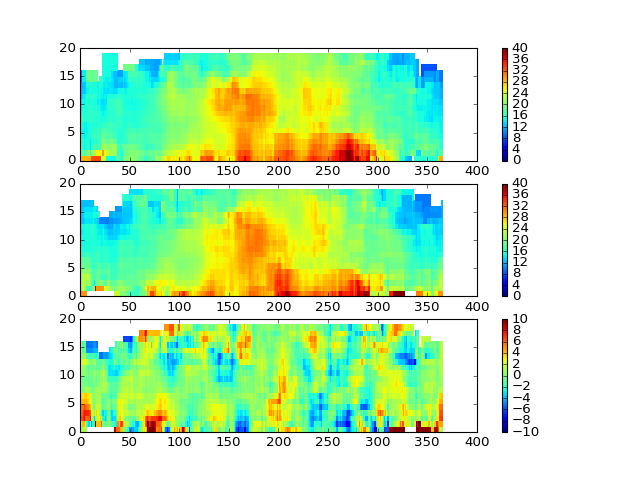

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(311)
plt.pcolormesh(ints_mean_p1[0][:,1:20].T, vmin=0, vmax=40)
plt.colorbar()

ax1 = fig.add_subplot(312)
plt.pcolormesh(ints_mean_p2[0][:,1:20].T, vmin=0, vmax=40)
plt.colorbar()

ax1 = fig.add_subplot(313)
plt.pcolormesh(ints_mean_p2[0][:,1:20].T-ints_mean_p1[0][:,1:20].T, vmin=-10, vmax=10)
plt.colorbar()
